In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Loading the Dataset

In [3]:
df= pd.read_csv('loan_data_set.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.shape # Dataset Consists of 614 rows and 13 columns 

(614, 13)

Description of the dataset

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# We can count how many number of people belong to urban areas, rural or semi urban also visualise some of the non-numeric columns.

Total graduates are :  480
Total non graduates are:  134


<AxesSubplot:xlabel='Education', ylabel='count'>

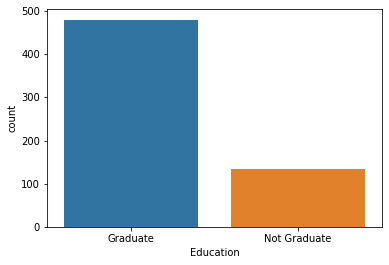

In [9]:
graduated = df['Education'].value_counts()['Graduate']
not_graduated =df['Education'].value_counts()['Not Graduate']
print("Total graduates are : ",graduated)
print("Total non graduates are: ",not_graduated)  
sns.countplot(x='Education',data=df)

Total approved loans are :  422
Total non approved loans are:  192


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

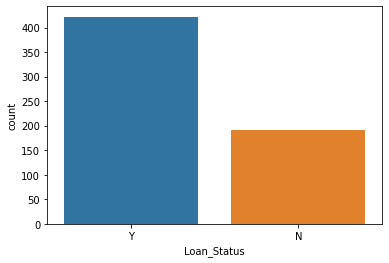

In [10]:
approved_loan = df['Loan_Status'].value_counts()['Y']
not_approved_loan =df['Loan_Status'].value_counts()['N']
print("Total approved loans are : ",approved_loan)
print("Total non approved loans are: ",not_approved_loan)  
sns.countplot(x="Loan_Status",data=df)

Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

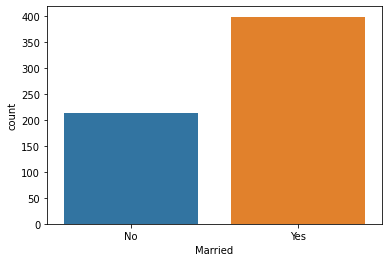

In [11]:
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df)
#Near about 65% of the applicants in the dataset are married.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

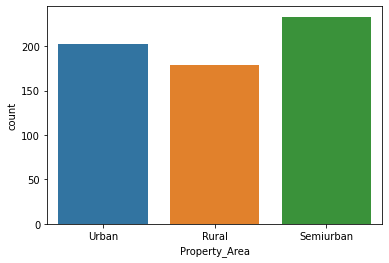

In [12]:
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area',data=df)

No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

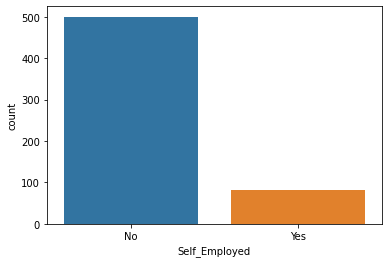

In [13]:
print(df['Self_Employed'].value_counts()) # Only 16.5 % people are self employed
sns.countplot(x='Self_Employed',data=df)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

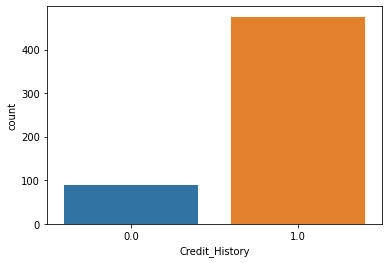

In [14]:
print(df['Credit_History'].value_counts()) 
sns.countplot(x='Credit_History',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

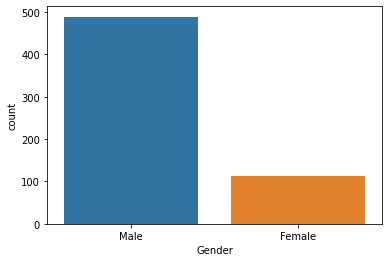

In [15]:
sns.countplot(x='Gender',data=df) # Approx 100 customers are female and rest of them are male

# Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

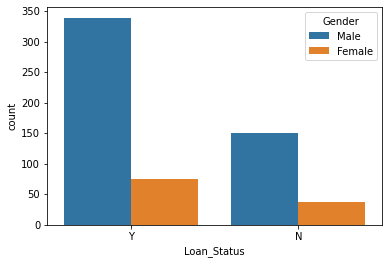

In [16]:
sns.countplot(x="Loan_Status", hue="Gender", data=df) 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

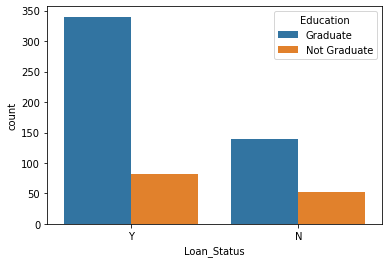

In [17]:
sns.countplot(x="Loan_Status", hue="Education", data=df) #Graduate people are more eligible for loan 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

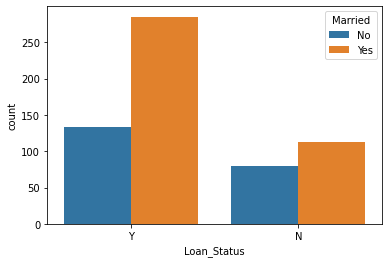

In [18]:
sns.countplot(x="Loan_Status",hue="Married",data=df) #The proportion of married gettting the loan approved is more

In [19]:
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True) #people with a credit history as 1 likely to get their loans approved.

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

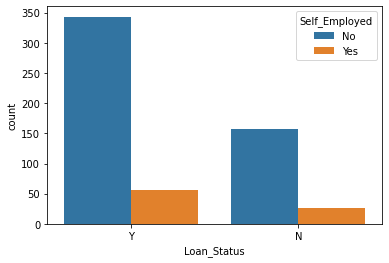

In [20]:
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df) 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

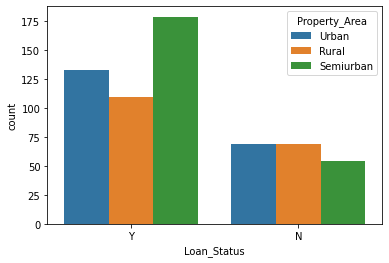

In [21]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)

In [22]:
cr= df.corr()
cr

# Justifies the correlation between diffrent numeric attributes

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

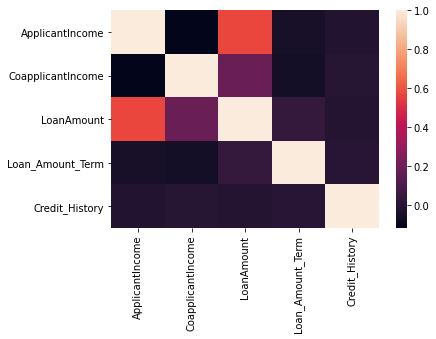

In [23]:
sns.heatmap(cr)

Here we visualize the avg.income of people whose loan has been approved vs the avg.income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

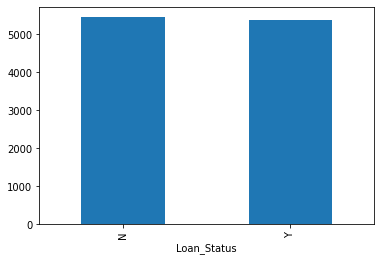

In [24]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<AxesSubplot:xlabel='ApplicantIncome'>

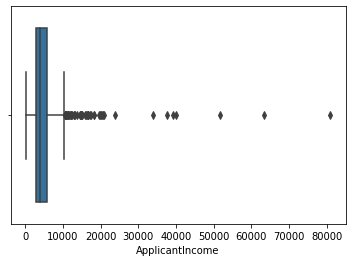

In [25]:
sns.boxplot(x=df['ApplicantIncome'])

# Finding outliers in the ApllicantIncome

In [26]:
q1 =df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)
IQR= q3-q1
lower_Range = q1 -(1.5 * IQR)
upper_Range = q3 + (1.5 * IQR)

In [27]:
df[df['ApplicantIncome']>upper_Range] # several outliers as expected from the above boxplot

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N


In [28]:
df[df['ApplicantIncome']<lower_Range] # There are none

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


<AxesSubplot:>

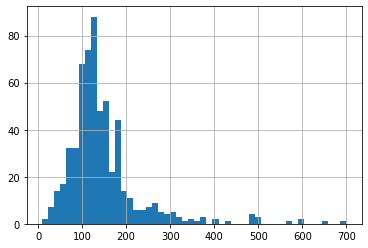

In [29]:
#  Histogram of the LoanAmount column 
df['LoanAmount'].hist(bins=50)

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

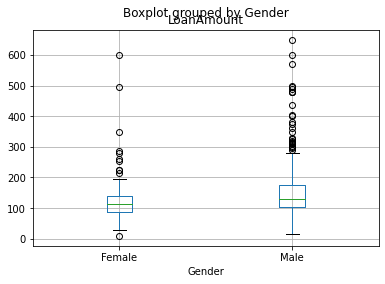

In [30]:
df.boxplot(column='LoanAmount', by = 'Gender')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

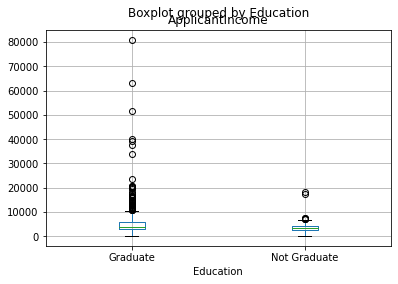

In [31]:
df.boxplot(column='ApplicantIncome', by = 'Education')